In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [68]:
data = pd.read_csv("fifa21_male2.csv", index_col=0) #reading the data using panda
data


,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,

In [67]:
data = pd.read_csv(file_path, index_col=0)

NameError: name 'file_path' is not defined

# Data Cleaning

**standardization**

In [3]:
#Replacing space in the column names and standardizing them
cols = [data.columns[i].lower().replace(' ', '_') for i in range(len(data.columns))] 
 
cols

['id',
 'name',
 'age',
 'ova',
 'nationality',
 'club',
 'bov',
 'bp',
 'position',
 'player_photo',
 'club_logo',
 'flag_photo',
 'pot',
 'team_&_contract',
 'height',
 'weight',
 'foot',
 'growth',
 'joined',
 'loan_date_end',
 'value',
 'wage',
 'release_clause',
 'contract',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'base_stats',
 'w/f',
 'sm',
 'a/w',
 'd/w',
 'ir',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 

In [4]:
data.columns = cols
data

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [5]:
#Showing all the 107 columns to check them
pd.set_option('display.max_columns', None)
data

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [6]:
#Renaming some columns with their full for not getting confused
data = data.rename(columns={'ova':'overal_points',
                            'pot':'potential_scores',
                            'w/f':'weak_foot', 'sm' : 'skill_moves', 'ir' : 'international_reputation', 'gk':'goal_keeper', 'cf': 'center_forward'})

In [7]:
data.head()

,id,name,age,overal_points,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,potential_scores,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,weak_foot,skill_moves,a/w,d/w,international_reputation,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,center_forward,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,goal_keeper,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [8]:
#checking the name of all the columns in a list
data.columns
print(data.columns.tolist())

['id', 'name', 'age', 'overal_points', 'nationality', 'club', 'bov', 'bp', 'position', 'player_photo', 'club_logo', 'flag_photo', 'potential_scores', 'team_&_contract', 'height', 'weight', 'foot', 'growth', 'joined', 'loan_date_end', 'value', 'wage', 'release_clause', 'contract', 'attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats', 'base_stats', 'weak_foot', 'skill_moves', 'a/w', 'd/w', 'international_reputation', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'ls', 'st'

In [9]:
data.shape #check the number of rows and columns in data

(17125, 107)

In [10]:
print(data.isna().sum().tolist())#Checking the columns with null values in a list as the number of columns is too much and I couldn't see all the columns with null values without converting them to a list

[0, 0, 0, 0, 0, 23, 0, 0, 413, 0, 23, 0, 0, 0, 0, 0, 0, 0, 58, 16215, 0, 0, 0, 0, 0, 0, 0, 0, 0, 58, 0, 0, 58, 0, 0, 0, 0, 0, 0, 58, 0, 58, 0, 0, 58, 0, 0, 0, 0, 0, 7, 7, 58, 0, 423, 0, 0, 0, 58, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 89, 89, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


*The column 'loan_date_end' has a very high number of null values compared to the number of rows (16215) and can be dropped.*

In [11]:
data['gender'].unique()

array(['Male'], dtype=object)

In [12]:
#droping the columns with a very high number of nulls compared to the number of data (loan_date_end) and 'id', 'player_photo', 'club_logo', 'flag_photo', etc columns because they don't add value to our data and we don't need them to answer our questions. Gender column was deleted because it only has one value for all the rows.
data = data.drop(['loan_date_end', 'id', 'contract','foot','wage','player_photo', 'club_logo', 'flag_photo', 'gender', 'team_&_contract', 'joined', 'release_clause', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'ls', 'st', 'rs', 'lw', 'lf', 'center_forward', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 
                  'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'goal_keeper', 'a/w', 'd/w','growth', 'bov', 'bp', 'position', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'
                 ], axis = 1) 


In [13]:
data

,name,age,overal_points,nationality,club,potential_scores,height,weight,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,total_stats,base_stats,weak_foot,skill_moves,international_reputation
0,G. Pasquale,33,69,Italy,Udinese,69,"6'0""",181lbs,€625K,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,1929,408,3 ★,2★,2 ★
1,Luis García,37,71,Spain,KAS Eupen,71,"5'10""",143lbs,€600K,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,1906,385,4 ★,3★,1 ★
2,J. Cole,33,71,England,Coventry City,71,"5'9""",161lbs,€1.1M,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,1770,354,4 ★,4★,2 ★
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,82,"5'11""",165lbs,€0,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,1348,369,3 ★,1★,1 ★
4,Iniesta,36,81,Spain,Vissel Kobe,81,"5'7""",150lbs,€5.5M,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,2014,420,4 ★,4★,4 ★
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,CD Tondela,69,"6'6""",165lbs,€550K,197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.0,198,61,71,1367,302,2 ★,2★,1 ★
17121,W. Rickard,18,56,Wales,Burnley,66,"5'10""",170lbs,€130K,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,1529,319,3 ★,2★,1 ★
17122,C. Barrett,18,56,England,Burnley,67,"5'9""",154lbs,€130K,218,55,34,53,42,34.0,212,52,43.0,34,36,47,308,66,61,54.0,59,68.0,233,28,61.0,53,54,37,256,58,55.0,49.0,45.0,49,43.0,163,55,54,1430,303,3 ★,2★,1 ★
17123,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,73,"5'9""",148lbs,€475K,223,62,26,52,60,23.0,258,55,43.0,46,57,57,349,72,70,74.0,56,77.0,261,51,72.0,57,48,33,257,61,58.0,46.0,56.0,36,54.0,180,57,62,1579,335,4 ★,2★,1 ★


**Dealing with null values:**

In [14]:
print(data.isna().sum()) #checking the columns with high number of null values after dropping the columns. The null calues of the columns that have 7 nulls can be droped as it's a very low number compared to the number of rows

name                          0
age                           0
overal_points                 0
nationality                   0
club                         23
potential_scores              0
height                        0
weight                        0
value                         0
attacking                     0
crossing                      0
finishing                     0
heading_accuracy              0
short_passing                 0
volleys                      58
skill                         0
dribbling                     0
curve                        58
fk_accuracy                   0
long_passing                  0
ball_control                  0
movement                      0
acceleration                  0
sprint_speed                  0
agility                      58
reactions                     0
balance                      58
power                         0
shot_power                    0
jumping                      58
stamina                       0
strength

In [15]:
#deleting null values from 'interceptions' and 'positioning' as they only have 7 null values compared to the number of rows.
data = data.dropna(subset=['interceptions', 'positioning'])

In [16]:
#Filling the null values with the median of the column
data[['composure', 'curve', 'agility', 'balance', 'jumping', 'vision', 'volleys']] = data[['composure', 'curve', 'agility', 'balance', 'jumping', 'vision', 'volleys']].fillna(data[['composure', 'curve', 'agility', 'balance', 'jumping', 'vision', 'volleys']].median())

In [17]:
#filling the null values of the 'club' column with 'unknown' as it's an object
data["club"].fillna("unknown", inplace = True)

**Checking the data type and changing it if necessary:**

In [18]:
#Checking data types in each column
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.dtypes)

name                         object
age                           int64
overal_points                 int64
nationality                  object
club                         object
potential_scores              int64
height                       object
weight                       object
value                        object
attacking                     int64
crossing                      int64
finishing                     int64
heading_accuracy              int64
short_passing                 int64
volleys                     float64
skill                         int64
dribbling                     int64
curve                       float64
fk_accuracy                   int64
long_passing                  int64
ball_control                  int64
movement                      int64
acceleration                  int64
sprint_speed                  int64
agility                     float64
reactions                     int64
balance                     float64
power                       

columns 'weight', 'height', 'value', 'weak_foot, 'skill_moves', 'international_reputation' are objects. We have to change their type to int and standardize them

In [19]:
data['weight'] = data['weight'].str.replace('lbs', '') #changing the type of weight to numeric to have a more standard data

In [20]:
data[["weight"]] = data[["weight"]].apply(pd.to_numeric)

In [21]:
data['weight'].dtypes

dtype('int64')

In [22]:

data[['composure', 'curve', 'agility', 'balance', 'jumping', 'vision', 'volleys']] = data[['composure', 'curve', 'agility', 'balance', 'jumping', 'vision', 'volleys']].astype(int) #removing the decimals to make them more standard

In [23]:
#changing the type of the columns to numeric to remove decimals with 0.
data[['interceptions', 'positioning']] = data[['interceptions', 'positioning']].astype(int)

In [24]:
data.head()

,name,age,overal_points,nationality,club,potential_scores,height,weight,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,total_stats,base_stats,weak_foot,skill_moves,international_reputation
0,G. Pasquale,33,69,Italy,Udinese,69,"6'0""",181,€625K,313,75,50,59,71,58,338,73,65,60,69,71,347,68,74,68,69,68,347,74,68,69,68,68,320,72,69,63,66,50,61,208,70,69,1929,408,3 ★,2★,2 ★
1,Luis García,37,71,Spain,KAS Eupen,71,"5'10""",143,€600K,337,68,64,61,76,68,369,69,79,79,71,71,305,56,50,62,65,72,324,75,54,64,60,71,362,71,71,72,73,75,79,153,70,43,1906,385,4 ★,3★,1 ★
2,J. Cole,33,71,England,Coventry City,71,"5'9""",161,€1.1M,337,80,64,41,77,75,387,79,84,77,69,78,295,48,42,71,59,75,284,72,58,29,56,69,317,69,39,69,74,66,61,99,35,34,1770,354,4 ★,4★,2 ★
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,82,"5'11""",165,€0,264,54,70,60,80,46,255,68,51,46,64,77,176,59,62,67,55,67,239,63,66,51,66,59,271,59,70,72,57,70,61,75,34,41,1348,369,3 ★,1★,1 ★
4,Iniesta,36,81,Spain,Vissel Kobe,81,"5'7""",150,€5.5M,367,75,69,54,90,79,408,85,80,70,83,90,346,61,56,79,75,75,297,67,40,58,62,70,370,58,70,78,93,71,89,181,68,57,2014,420,4 ★,4★,4 ★


*Still have to clean the columns of 'height', 'value'

In [25]:
#Converting the height data from inches to cm
data['height'] = (data['height']       
 .str.extract(r'(\d+)\'\s*(\d+)"')
 .astype(float)
 .mul([12*2.54, 2.54])
 .sum(axis=1)
 )

data.head()

,name,age,overal_points,nationality,club,potential_scores,height,weight,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,total_stats,base_stats,weak_foot,skill_moves,international_reputation
0,G. Pasquale,33,69,Italy,Udinese,69,182.88,181,€625K,313,75,50,59,71,58,338,73,65,60,69,71,347,68,74,68,69,68,347,74,68,69,68,68,320,72,69,63,66,50,61,208,70,69,1929,408,3 ★,2★,2 ★
1,Luis García,37,71,Spain,KAS Eupen,71,177.80,143,€600K,337,68,64,61,76,68,369,69,79,79,71,71,305,56,50,62,65,72,324,75,54,64,60,71,362,71,71,72,73,75,79,153,70,43,1906,385,4 ★,3★,1 ★
2,J. Cole,33,71,England,Coventry City,71,175.26,161,€1.1M,337,80,64,41,77,75,387,79,84,77,69,78,295,48,42,71,59,75,284,72,58,29,56,69,317,69,39,69,74,66,61,99,35,34,1770,354,4 ★,4★,2 ★
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,82,180.34,165,€0,264,54,70,60,80,46,255,68,51,46,64,77,176,59,62,67,55,67,239,63,66,51,66,59,271,59,70,72,57,70,61,75,34,41,1348,369,3 ★,1★,1 ★
4,Iniesta,36,81,Spain,Vissel Kobe,81,170.18,150,€5.5M,367,75,69,54,90,79,408,85,80,70,83,90,346,61,56,79,75,75,297,67,40,58,62,70,370,58,70,78,93,71,89,181,68,57,2014,420,4 ★,4★,4 ★


In [26]:

data['value'] = data['value'].replace({'€':'', 'K':'000'}, regex=True)

In [27]:
def money_correct(x):
    if('M' in str(x)):
        x = str(x).replace('M', '')
        x = float(x) * 1000000
    elif('K' in str(x)):
        x = str(x).replace('K', '')
        x = float(x) * 1000
    return float(x)

In [28]:
data['value'] = data['value'].apply(money_correct)

In [29]:
data

,name,age,overal_points,nationality,club,potential_scores,height,weight,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,total_stats,base_stats,weak_foot,skill_moves,international_reputation
0,G. Pasquale,33,69,Italy,Udinese,69,182.88,181,625000.0,313,75,50,59,71,58,338,73,65,60,69,71,347,68,74,68,69,68,347,74,68,69,68,68,320,72,69,63,66,50,61,208,70,69,1929,408,3 ★,2★,2 ★
1,Luis García,37,71,Spain,KAS Eupen,71,177.80,143,600000.0,337,68,64,61,76,68,369,69,79,79,71,71,305,56,50,62,65,72,324,75,54,64,60,71,362,71,71,72,73,75,79,153,70,43,1906,385,4 ★,3★,1 ★
2,J. Cole,33,71,England,Coventry City,71,175.26,161,1100000.0,337,80,64,41,77,75,387,79,84,77,69,78,295,48,42,71,59,75,284,72,58,29,56,69,317,69,39,69,74,66,61,99,35,34,1770,354,4 ★,4★,2 ★
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,82,180.34,165,0.0,264,54,70,60,80,46,255,68,51,46,64,77,176,59,62,67,55,67,239,63,66,51,66,59,271,59,70,72,57,70,61,75,34,41,1348,369,3 ★,1★,1 ★
4,Iniesta,36,81,Spain,Vissel Kobe,81,170.18,150,5500000.0,367,75,69,54,90,79,408,85,80,70,83,90,346,61,56,79,75,75,297,67,40,58,62,70,370,58,70,78,93,71,89,181,68,57,2014,420,4 ★,4★,4 ★
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,CD Tondela,69,198.12,165,550000.0,197,35,23,66,47,26,193,44,26,33,34,56,243,52,55,46,48,42,279,48,70,59,74,28,218,69,58,23,29,39,46,198,61,71,1367,302,2 ★,2★,1 ★
17121,W. Rickard,18,56,Wales,Burnley,66,177.80,170,130000.0,248,50,43,50,64,41,264,57,42,50,61,54,298,61,63,52,54,68,271,51,62,53,57,48,259,51,50,55,53,50,46,132,34,42,1529,319,3 ★,2★,1 ★
17122,C. Barrett,18,56,England,Burnley,67,175.26,154,130000.0,218,55,34,53,42,34,212,52,43,34,36,47,308,66,61,54,59,68,233,28,61,53,54,37,256,58,55,49,45,49,43,163,55,54,1430,303,3 ★,2★,1 ★
17123,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,73,175.26,148,475000.0,223,62,26,52,60,23,258,55,43,46,57,57,349,72,70,74,56,77,261,51,72,57,48,33,257,61,58,46,56,36,54,180,57,62,1579,335,4 ★,2★,1 ★


In [30]:
#We have to change the column into integer
data = data.astype({"value": 'int64'})

In [31]:
data

,name,age,overal_points,nationality,club,potential_scores,height,weight,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,total_stats,base_stats,weak_foot,skill_moves,international_reputation
0,G. Pasquale,33,69,Italy,Udinese,69,182.88,181,625000,313,75,50,59,71,58,338,73,65,60,69,71,347,68,74,68,69,68,347,74,68,69,68,68,320,72,69,63,66,50,61,208,70,69,1929,408,3 ★,2★,2 ★
1,Luis García,37,71,Spain,KAS Eupen,71,177.80,143,600000,337,68,64,61,76,68,369,69,79,79,71,71,305,56,50,62,65,72,324,75,54,64,60,71,362,71,71,72,73,75,79,153,70,43,1906,385,4 ★,3★,1 ★
2,J. Cole,33,71,England,Coventry City,71,175.26,161,1100000,337,80,64,41,77,75,387,79,84,77,69,78,295,48,42,71,59,75,284,72,58,29,56,69,317,69,39,69,74,66,61,99,35,34,1770,354,4 ★,4★,2 ★
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,82,180.34,165,0,264,54,70,60,80,46,255,68,51,46,64,77,176,59,62,67,55,67,239,63,66,51,66,59,271,59,70,72,57,70,61,75,34,41,1348,369,3 ★,1★,1 ★
4,Iniesta,36,81,Spain,Vissel Kobe,81,170.18,150,5500000,367,75,69,54,90,79,408,85,80,70,83,90,346,61,56,79,75,75,297,67,40,58,62,70,370,58,70,78,93,71,89,181,68,57,2014,420,4 ★,4★,4 ★
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,CD Tondela,69,198.12,165,550000,197,35,23,66,47,26,193,44,26,33,34,56,243,52,55,46,48,42,279,48,70,59,74,28,218,69,58,23,29,39,46,198,61,71,1367,302,2 ★,2★,1 ★
17121,W. Rickard,18,56,Wales,Burnley,66,177.80,170,130000,248,50,43,50,64,41,264,57,42,50,61,54,298,61,63,52,54,68,271,51,62,53,57,48,259,51,50,55,53,50,46,132,34,42,1529,319,3 ★,2★,1 ★
17122,C. Barrett,18,56,England,Burnley,67,175.26,154,130000,218,55,34,53,42,34,212,52,43,34,36,47,308,66,61,54,59,68,233,28,61,53,54,37,256,58,55,49,45,49,43,163,55,54,1430,303,3 ★,2★,1 ★
17123,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,73,175.26,148,475000,223,62,26,52,60,23,258,55,43,46,57,57,349,72,70,74,56,77,261,51,72,57,48,33,257,61,58,46,56,36,54,180,57,62,1579,335,4 ★,2★,1 ★


In [32]:
no_nulls = set(data.columns[np.sum(data.isnull()) == 0]) #Provide a set of columns with 0 missing values.
print(no_nulls)

{'vision', 'shot_power', 'standing_tackle', 'skill', 'skill_moves', 'fk_accuracy', 'nationality', 'defending', 'short_passing', 'weight', 'agility', 'interceptions', 'value', 'base_stats', 'overal_points', 'curve', 'finishing', 'positioning', 'composure', 'international_reputation', 'heading_accuracy', 'height', 'volleys', 'ball_control', 'potential_scores', 'acceleration', 'long_passing', 'total_stats', 'long_shots', 'reactions', 'movement', 'jumping', 'stamina', 'marking', 'age', 'name', 'attacking', 'club', 'power', 'balance', 'mentality', 'penalties', 'weak_foot', 'aggression', 'strength', 'sprint_speed', 'dribbling', 'crossing'}


In [33]:
#I notice a symbol in the nationality column so I will check the whole column as well as club and name just to be sure
data.nationality.unique()

array(['Italy', 'Spain', 'England', 'Trinidad &amp; Tobago', 'Germany',
       'Turkey', 'Wales', 'Republic of Ireland', 'Nigeria', 'Brazil',
       'Australia', 'Hungary', 'Argentina', 'Portugal', 'Netherlands',
       'France', 'Norway', 'Bulgaria', 'Poland', 'United States', 'Mali',
       'Finland', 'Iceland', 'Czech Republic', 'Serbia', 'Sweden',
       'Georgia', 'Denmark', 'Senegal', 'Israel', 'Cameroon', 'Greece',
       'Scotland', 'Ukraine', 'China PR', 'Colombia', 'Belgium',
       'Ivory Coast', 'Switzerland', 'Canada', 'Chile', 'Peru',
       'Paraguay', 'Mexico', 'Japan', 'Ghana', 'Korea Republic',
       'Belarus', 'Egypt', 'Congo', 'Uruguay', 'South Africa',
       'Northern Ireland', 'Togo', 'Jamaica', 'Austria', 'Algeria',
       'Morocco', 'Albania', 'North Macedonia', 'Slovenia', 'Madagascar',
       'Croatia', 'Kosovo', 'Estonia', 'Moldova', 'Bosnia Herzegovina',
       'Russia', 'Romania', 'DR Congo', 'Antigua &amp; Barbuda',
       'Burkina Faso', 'Panama', 'Gibr

In [34]:
nationality_correct = ['nationality']
data[nationality_correct] = data[nationality_correct].replace({'&amp;':'and'}, regex=True)
data.nationality.unique()

array(['Italy', 'Spain', 'England', 'Trinidad and Tobago', 'Germany',
       'Turkey', 'Wales', 'Republic of Ireland', 'Nigeria', 'Brazil',
       'Australia', 'Hungary', 'Argentina', 'Portugal', 'Netherlands',
       'France', 'Norway', 'Bulgaria', 'Poland', 'United States', 'Mali',
       'Finland', 'Iceland', 'Czech Republic', 'Serbia', 'Sweden',
       'Georgia', 'Denmark', 'Senegal', 'Israel', 'Cameroon', 'Greece',
       'Scotland', 'Ukraine', 'China PR', 'Colombia', 'Belgium',
       'Ivory Coast', 'Switzerland', 'Canada', 'Chile', 'Peru',
       'Paraguay', 'Mexico', 'Japan', 'Ghana', 'Korea Republic',
       'Belarus', 'Egypt', 'Congo', 'Uruguay', 'South Africa',
       'Northern Ireland', 'Togo', 'Jamaica', 'Austria', 'Algeria',
       'Morocco', 'Albania', 'North Macedonia', 'Slovenia', 'Madagascar',
       'Croatia', 'Kosovo', 'Estonia', 'Moldova', 'Bosnia Herzegovina',
       'Russia', 'Romania', 'DR Congo', 'Antigua and Barbuda',
       'Burkina Faso', 'Panama', 'Gibralta

In [35]:
data.isnull().sum().sort_values(ascending = False) #provide a set of columns with null values in descending order

name                        0
age                         0
balance                     0
power                       0
shot_power                  0
jumping                     0
stamina                     0
strength                    0
long_shots                  0
mentality                   0
aggression                  0
interceptions               0
positioning                 0
vision                      0
penalties                   0
composure                   0
defending                   0
marking                     0
standing_tackle             0
total_stats                 0
base_stats                  0
weak_foot                   0
skill_moves                 0
reactions                   0
agility                     0
sprint_speed                0
finishing                   0
overal_points               0
nationality                 0
club                        0
potential_scores            0
height                      0
weight                      0
value     

*The data looks clean now!*

In [36]:
df = data.copy()

In [37]:
df

,name,age,overal_points,nationality,club,potential_scores,height,weight,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,total_stats,base_stats,weak_foot,skill_moves,international_reputation
0,G. Pasquale,33,69,Italy,Udinese,69,182.88,181,625000,313,75,50,59,71,58,338,73,65,60,69,71,347,68,74,68,69,68,347,74,68,69,68,68,320,72,69,63,66,50,61,208,70,69,1929,408,3 ★,2★,2 ★
1,Luis García,37,71,Spain,KAS Eupen,71,177.80,143,600000,337,68,64,61,76,68,369,69,79,79,71,71,305,56,50,62,65,72,324,75,54,64,60,71,362,71,71,72,73,75,79,153,70,43,1906,385,4 ★,3★,1 ★
2,J. Cole,33,71,England,Coventry City,71,175.26,161,1100000,337,80,64,41,77,75,387,79,84,77,69,78,295,48,42,71,59,75,284,72,58,29,56,69,317,69,39,69,74,66,61,99,35,34,1770,354,4 ★,4★,2 ★
3,D. Yorke,36,68,Trinidad and Tobago,Sunderland,82,180.34,165,0,264,54,70,60,80,46,255,68,51,46,64,77,176,59,62,67,55,67,239,63,66,51,66,59,271,59,70,72,57,70,61,75,34,41,1348,369,3 ★,1★,1 ★
4,Iniesta,36,81,Spain,Vissel Kobe,81,170.18,150,5500000,367,75,69,54,90,79,408,85,80,70,83,90,346,61,56,79,75,75,297,67,40,58,62,70,370,58,70,78,93,71,89,181,68,57,2014,420,4 ★,4★,4 ★
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,CD Tondela,69,198.12,165,550000,197,35,23,66,47,26,193,44,26,33,34,56,243,52,55,46,48,42,279,48,70,59,74,28,218,69,58,23,29,39,46,198,61,71,1367,302,2 ★,2★,1 ★
17121,W. Rickard,18,56,Wales,Burnley,66,177.80,170,130000,248,50,43,50,64,41,264,57,42,50,61,54,298,61,63,52,54,68,271,51,62,53,57,48,259,51,50,55,53,50,46,132,34,42,1529,319,3 ★,2★,1 ★
17122,C. Barrett,18,56,England,Burnley,67,175.26,154,130000,218,55,34,53,42,34,212,52,43,34,36,47,308,66,61,54,59,68,233,28,61,53,54,37,256,58,55,49,45,49,43,163,55,54,1430,303,3 ★,2★,1 ★
17123,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,73,175.26,148,475000,223,62,26,52,60,23,258,55,43,46,57,57,349,72,70,74,56,77,261,51,72,57,48,33,257,61,58,46,56,36,54,180,57,62,1579,335,4 ★,2★,1 ★


**Which club produces the best players???**

In [38]:
#Finding the number of clubs in Fifa
num_of_clubs = df['club'].value_counts()
num_of_clubs

Chelsea                            45
Bolton Wanderers                   45
Manchester United                  45
Wolverhampton Wanderers            43
Sunderland                         43
                                   ..
Triestina                           1
Associação Académica de Coimbra     1
US Créteil-Lusitanos                1
FC Arouca                           1
Palermo                             1
Name: club, Length: 917, dtype: int64

In [39]:
#Finding the total number of clubs in Fifa:
print('There are {} different clubs in FIFA 2021.'.format(num_of_clubs.count()))
     

There are 917 different clubs in FIFA 2021.


In [40]:
#Check the potential scores of players:
sort_potential = df.sort_values(['potential_scores', 'overal_points'], ascending = [False, False]).head(20)
best_potential_score = sort_potential[['name','club', 'potential_scores', 'overal_points']]
best_potential_score

,name,club,potential_scores,overal_points
9331,K. Mbappé,Paris Saint-Germain,95,90
752,L. Messi,FC Barcelona,93,93
3665,J. Oblak,Atlético Madrid,93,91
2790,M. ter Stegen,FC Barcelona,93,90
9633,J. Sancho,Borussia Dortmund,93,87
10354,K. Havertz,Chelsea,93,85
12361,João Félix,Atlético Madrid,93,81
11207,Vinícius Jr.,Real Madrid,93,80
142,Cristiano Ronaldo,Juventus,92,92
9212,T. Alexander-Arnold,Liverpool,92,87


*based on potential scores, Paris Saint-Germain, FC Barcelona, Atlético Madrid clubs produce the best players. Let's check more paramteres that are important for being a good player and see which club has those players.*

In [41]:
top3 = [['Paris Saint-Germain', 95, 90], ['FC Barcelona', 93, 93], ['Atlético Madrid', 93, 91]]
top3df = pd.DataFrame(top3, columns=["club","potential_scores","overal_points"])
print(top3df)

                  club  potential_scores  overal_points
0  Paris Saint-Germain                95             90
1         FC Barcelona                93             93
2      Atlético Madrid                93             91


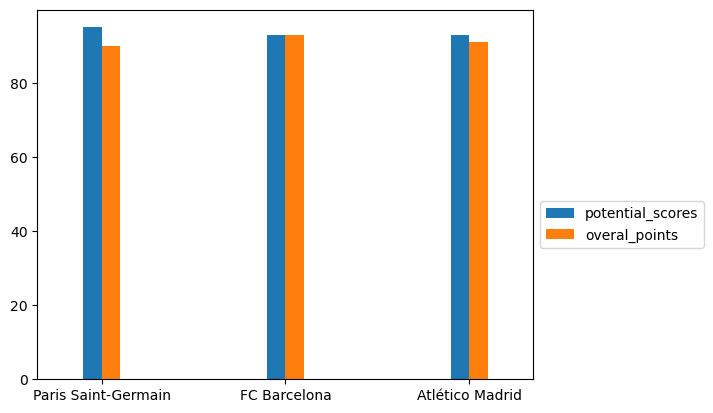

<Figure size 640x480 with 0 Axes>

In [42]:
#Plot a Bar Chart for the Top 3 clubs depending on their players' scores:


top3df.plot(x='club', y=['potential_scores', 'overal_points'], kind='bar', width = 0.2).legend(bbox_to_anchor=(1, 0.5))
plt.ylabel('', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xlabel('', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xticks(rotation = 360)
plt.show()
plt.savefig('books_read.png')

In [43]:
#Checking the frequency of clubs with best scores (among first 20 clubs)
best_potential_score.groupby('club').count().sort_values(['potential_scores', 'overal_points'], ascending=[False, False])

,name,potential_scores,overal_points
club,,,
Liverpool,3,3,3
Atlético Madrid,2,2,2
Borussia Dortmund,2,2,2
FC Barcelona,2,2,2
Juventus,2,2,2
Manchester City,2,2,2
Paris Saint-Germain,2,2,2
Chelsea,1,1,1
FC Bayern München,1,1,1


*Liverpool, Atlético Madrid, Borussia Dortmund, Juventus, Liverpool have players with highest scores among players with top 20 highest scores*

In [ ]:
top3_frequency = [['Liverpool', 3, 3], ['Atlético Madrid', 2, 2], ['FC Barcelona', 2, 2], ['Paris Saint-Germain', 2, 2]]
top3df_freq = pd.DataFrame(top3_frequency, columns=["club","potential_scores","overal_points"])
print(top3df_freq)

In [ ]:
#Plot a Bar Chart for the Top 3 clubs depending on their players' scores:

top3df_freq.plot(x='club', y=['potential_scores', 'overal_points'], kind='bar').legend(bbox_to_anchor=(1, 0.5))
plt.ylabel('Number_of_players', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xlabel('', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xticks(rotation = 360)
plt.show()
plt.savefig('chart.png')

*Considering the clubs with the highest number of players with high scores, 'Liverpool' produces better players.*

In [ ]:
#Checking traits that are important for being a good player such as attacking and finishing
sort1 = df.sort_values(['attacking','finishing'],ascending=[False, False]).head(20)
sort_2 = sort1[['name','club', 'attacking','finishing']]
sort_2

*Considering 2 traits of attacking and finishing, Juventus, Juventus, Atlético Madrid clubs produce the best players.*

In [ ]:
top3_a = [['Juventus', 437, 95], ['FC Barcelona', 429, 95], ['Atlético Madrid', 429, 92]]
top3df_a = pd.DataFrame(top3_a, columns=["club","attacking","finishing"])
print(top3df_a)

In [ ]:
top3df_a.plot(x='club', y=['attacking', 'finishing'], kind='bar').legend(bbox_to_anchor=(1, 0.5))
plt.ylabel('', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xlabel('', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xticks(rotation = 360)
plt.show()
plt.savefig('chart2.png')

In [ ]:
#checking the frequency of clubs with players with best attacking and finishing among 20 top clubs
sort_2.groupby('club').count().sort_values(['attacking', 'finishing'],ascending=[False, False])

*Paris Saint-Germain, FC Barcelona, FC Bayern München, Manchester City, Tottenham Hotspur have the highest number of players with best attacking and finishing among top 20 clubs.*

In [ ]:
top3_b = [['Paris Saint-Germain', 3, 3], ['FC Barcelona', 2, 2], ['Atlético Madrid', 1, 1], ['Juventus', 1, 1]]
top3df_b = pd.DataFrame(top3_b, columns=["club","attacking","finishing"])
print(top3df_b)

In [ ]:
top3df_b.plot(x='club', y=['attacking', 'finishing'], kind='bar').legend(bbox_to_anchor=(1, 1))
plt.ylabel('Number_of_players', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xlabel('', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xticks(rotation = 360)
plt.show()
plt.savefig('chart2.png')

In [ ]:
#Checking the passes of top 20 players
sort_pass = df.sort_values(['dribbling', 'volleys'],ascending=[False, False]).head(20)
sort_pass1 = sort_pass[['name','club','dribbling', 'volleys']]
sort_pass1

*FC Barcelona, Paris Saint-Germain, Real Madrid have the best players in case of dribling and volleys.*

In [ ]:
top3_d = [['FC Barcelona', 96, 88], ['Paris Saint-Germain', 95, 87], ['Real Madrid', 93, 83]]
top3df_d = pd.DataFrame(top3_d, columns=["club","dribbling","volleys"])


In [ ]:
top3df_d.plot(x='club', y=['dribbling', 'volleys'], kind='bar').legend(bbox_to_anchor=(1, 1))
plt.ylabel('', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xlabel('', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xticks(rotation = 360)
plt.show()
plt.savefig('chart2.png')

In [ ]:
#checking the frequency of clubs with players with best dribbling and volleys among 20 top clubs
sort_pass1.groupby('club').count().sort_values(['dribbling', 'volleys'],ascending=[False, False])

*Liverpool, Juventus, Manchester City have the highest number of players with best dribbling and volleys among top 20 clubs.*

In [ ]:
top3_e = [['Liverpool', 4, 4], ['Juventus', 3, 3], ['Manchester City', 3, 3], ['Paris Saint-Germain', 2, 2], ['Real Madrid', 2, 2], ['FC Barcelona', 1,1]]
top3df_e = pd.DataFrame(top3_e, columns=["club","dribbling","volleys"])
print(top3df_e)

In [ ]:
top3df_e.plot(x='club', y=['dribbling', 'volleys'], kind='bar').legend(bbox_to_anchor=(1, 1))
plt.ylabel('Number_of_players', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xlabel('', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xticks(rotation = 45)
plt.show()
plt.savefig('chart4.png')

In [ ]:
sort_speed = df.sort_values(['acceleration', 'sprint_speed'],ascending=[False, False]).head(20)
sort_speed1 = sort_speed[['name','club', 'acceleration', 'sprint_speed']]
sort_speed1

*Wolverhampton Wanderers, Paris Saint-Germain, FC Bayern München have the players with best acceleration and sprint_speed among top 20 teams.*

In [ ]:
top3_f = [['Wolverhampton Wanderers', 97, 96], ['Paris Saint-Germain', 96, 96], ['FC Bayern München', 96, 96]]
top3df_f = pd.DataFrame(top3_f, columns=["club","acceleration","sprint_speed"])
print(top3df_f)

In [ ]:
top3df_f.plot(x='club', y=['acceleration', 'sprint_speed'], kind='bar').legend(bbox_to_anchor=(1, 1))
plt.ylabel('', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xlabel('', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xticks(rotation = 20)
plt.show()
plt.savefig('chart4.png')

In [ ]:
#checking the frequency of clubs with players with best dribbling and dribbling among 20 top clubs
sort_speed1.groupby('club').count().sort_values(['acceleration', 'sprint_speed'],ascending=[False, False])

*There isn't a difference in frequency among different team. So Maybe this is not the best trait to be considered.*

In [ ]:
sort_power = df.sort_values(['strength', 'aggression'],ascending=[False, False]).head(20)
sort_power1 = sort_power[['name','club','strength', 'aggression']]
sort_power1

*Wycombe Wanderers, Philadelphia Union, Orlando City SC have the best players in terms of strength and aggression among top 20 clubs.*

In [ ]:
top3_g = [['Wolverhampton Wanderers', 97, 69], ['Philadelphia Union', 96, 78], ['Orlando City SC', 96, 60]]
top3df_g = pd.DataFrame(top3_g, columns=["club","strength","aggression"])
print(top3df_g)

In [ ]:
top3df_g.plot(x='club', y=['strength', 'aggression'], kind='bar').legend(bbox_to_anchor=(1, 1))
plt.ylabel('', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xlabel('', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xticks(rotation = 20)
plt.show()


In [ ]:
#checking the frequency of clubs with players with best strength and aggression among 20 top clubs
sort_power1.groupby('club').count().sort_values(['strength', 'aggression'],ascending=[False, False])

*Wycombe Wanderers has the highest number of players that have the best strength and aggression among top 20 clubs.*

In [ ]:
top3_h = [['Wolverhampton Wanderers', 2, 2], ['Philadelphia Union', 1, 1], ['Orlando City SC',1,1]]
top3df_h = pd.DataFrame(top3_h, columns=["club","strength","aggression"])
print(top3df_h)

In [ ]:
top3df_h.plot(x='club', y=['strength', 'aggression'], kind='bar').legend(bbox_to_anchor=(1, 1))
plt.ylabel('Number_of_players', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xlabel('', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xticks(rotation = 20)
plt.show()


In [ ]:
sort_defend = df.sort_values(['defending', 'marking'],ascending=[False, False]).head(20)
sort_defend1 = sort_defend[['name','club','defending', 'marking' ]]
sort_defend1

*Juventus, Liverpool, FC Bayern München have players with best defending and marking among top 20 clubs.*

In [ ]:
top3_i = [['Juventus', 272, 94], ['Liverpool', 272,93], ['FC Bayern München',268,86]]
top3df_i = pd.DataFrame(top3_i, columns=["club","defending","marking"])
print(top3df_i)

In [ ]:
top3df_i.plot(x='club', y=['defending', 'marking'], kind='bar').legend(bbox_to_anchor=(1, 1))
plt.ylabel('', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xlabel('', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xticks(rotation = 360)
plt.show()


In [ ]:
#checking the frequency of clubs with players with best defending and marking among 20 top clubs
sort_defend1.groupby('club').count().sort_values(['defending', 'marking'],ascending=[False, False])

*Juventus, Inter, Real Madrid have the highest number of players with best defending and marking.*

In [ ]:
top3_j = [['Juventus', 3, 3], ['Inter', 2,2], ['Real Madrid',2,2]]
top3df_j = pd.DataFrame(top3_j, columns=["club","defending","marking"])
print(top3df_j)

In [ ]:
top3df_j.plot(x='club', y=['defending', 'marking'], kind='bar').legend(bbox_to_anchor=(1, 1))
plt.ylabel('Number_of_players', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xlabel('', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
plt.xticks(rotation = 360)
plt.show()

In [ ]:
top3_final = [['FC Barcelona', 2], ['Juventus', 2], ['Atletico madrid', 1], ['Paris Saint-Germain', 1], ['Real Madrid', 1], ['Liverpool', 1], ['Wolverhampton Wanderers', 1], ['Orlando City SC',1],
              [' FC Bayern München',1],['Philadelphia Union',1]]

top3_final_1 = pd.DataFrame(top3_final, columns=["club","total_best_features"])
print(top3_final_1)

In [ ]:
y = ['FC Barcelona', 'Juventus', 'Atletico madrid', 'Paris Saint-Germain', 'Real Madrid', 'Liverpool', 'Wolverhampton Wanderers', 'Orlando City SC', 'FC Bayern München', 'Philadelphia Union']
x = [2,2,1,1,1,1,1,1,1,1]
plt.barh(y, x)
 
# setting label of y-axis
plt.ylabel("club")
 
# setting label of x-axis
plt.xlabel("total_best_features")

plt.show()

In [ ]:

print("\nDataframe - Gradient color:")
top3_final_1.style.background_gradient()

In [44]:
top3_count = [['Juventus', 3], ['Paris Saint-Germain', 2], ['Real Madrid', 2], ['FC Barcelona', 1], ['Atlético Madrid', 1], ['Liverpool', 1], ['Wolverhampton Wanderers', 1], ['Orlando City SC',1],
              [' Manchester City',1],['Inter',1],['Philadelphia Union',1]]

top3_count_1 = pd.DataFrame(top3_count, columns=["club","num_of_best_players"])
print(top3_count_1)

                       club  num_of_best_players
0                  Juventus                    3
1       Paris Saint-Germain                    2
2               Real Madrid                    2
3              FC Barcelona                    1
4           Atlético Madrid                    1
5                 Liverpool                    1
6   Wolverhampton Wanderers                    1
7           Orlando City SC                    1
8           Manchester City                    1
9                     Inter                    1
10       Philadelphia Union                    1


In [ ]:
top3_count_1.plot.barh(x='club', y='num_of_best_players', color='blue')

In [ ]:
print("\nDataframe - Gradient color:")
top3_count_1.style.background_gradient()

# numerical target: What ages do the best players have?

**EDA**

In [ ]:
df

In [ ]:
len(df)

In [ ]:
df.info()

In [ ]:
df['age'].unique()

In [ ]:
df.describe()

In [ ]:
plt.scatter(df['age'],df['acceleration'])
plt.show()

*scatter is not the best to gather information from data. Let's check other plots*

In [ ]:
data['age'].hist()
plt.show()

In [ ]:
# Create a new dataframe with only the numerical columns using select_dtypes
num = df.select_dtypes(np.number)
num.head()

In [ ]:
for column in num.columns:
    sns.distplot(df[column])
    plt.show()

In [ ]:
df.corr().apply(lambda x: round(x,2))

In [ ]:
# create correlation matrix with abs values
corr_matrix = df.corr().abs()

# change this value as needed, if 0.5 does not work for your scenario
threshold = 0.5

filtered_corr_df = corr_matrix[(corr_matrix >= threshold) & (corr_matrix != 1.000)] 

plt.figure(figsize=(50,20))
sns.heatmap(filtered_corr_df, annot=True, cmap="Reds")
plt.show()

*overal_points has high correlation with the target. So, we should keep it. But it also has a high correlation with 'base_stats', composure, total_stats, reactions, value. So, all these columns can be dropped.
height is highly correlated with balance, agility, movement, and weight. so these columns can be dropped.
attacking is highly correlated with many columns including penalties, positioning, vision, mentality, long_shots, stamina, ball_control,long_passing, fk_accuracy, curve, dribbling, skill, volleys, short_passing, heading_accuracy, finishing, and crossing.



In [ ]:
new_df = df.drop(['base_stats', 'composure', 'total_stats', 'vision', 'shot_power', 'power', 'balance', 'agility', 'weight', 'penalties', 'positioning', 
                  'mentality', 'long_shots', 'ball_control', 'long_passing', 'fk_accuracy', 'curve','dribbling',
                  'skill', 'volleys', 'short_passing', 'heading_accuracy', 'finishing', 'crossing','height', 'potential_scores' 'reactions'], axis = 1)

new_df

In [ ]:
corr_matrix = new_df.corr().abs()

# change this value as needed, if 0.5 does not work for your scenario
threshold = 0.5

filtered_corr_df = corr_matrix[(corr_matrix >= threshold) & (corr_matrix != 1.000)] 

plt.figure(figsize=(50,20))
sns.heatmap(filtered_corr_df, annot=True, cmap="Reds")
plt.show()

In [ ]:
new_df.corr().apply(lambda x: round(x,2))

*Still acceleration and sprint_speed are highly correlated. so it can be removed.
agression is highly correlated with interceptions, defending, marking, standing_tackle. 


In [ ]:
new_df1 = new_df.drop(['sprint_speed', 'interceptions', 'defending', 'marking', 'standing_tackle'],axis = 1)
new_df1

In [ ]:
#HEATMAP
mask = np.zeros_like(new_df1.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(new_df1.corr(), mask=mask, annot=True)
plt.show()

# Processing Data

In [ ]:
#X-y split:
y = new_df['age'] #splitting the target and other columns
X = new_df.drop(['age'], axis=1)
X.head()

In [ ]:
numerical = X.select_dtypes(include = np.number)#splitting categorical and numerical columns
categoricals = X.select_dtypes(include = np.object)
categoricals

In [ ]:
for column in numerical:
    sns.distplot(new_df[column])
    plt.show()

# numericals normalization using box-cox

# Outliers (Checking them after box-cox normalization)

In [ ]:
#This is the only column with the high number of outliers. So, we should deal with them by calculating iqr:
sns.boxplot(x=numerical['attacking'],whis=2) #check the outliers

In [ ]:
iqr = np.percentile(numerical['attacking'],75) - np.percentile(numerical['attacking'],25) # measuring the iqr of the column
iqr 

In [ ]:
# define the limits
upper_limit = np.percentile(numerical['attacking'],75) + 8*iqr
lower_limit = np.percentile(numerical['attacking'],25) - 8*iqr
upper_limit, lower_limit

In [ ]:
new_df1 = new_df1[(numerical['attacking']>lower_limit) & (numerical['attacking']<upper_limit)] #removing outliers from the data
new_df1

*The number of the rows after removing the outliers didn't change meaning that there aren't any outliers outside the defined limits*

# Encoding categoricals

In [ ]:
categoricals['nationality'].unique()

* In case of nationality, name, and club, they have many unique values. Therefore, I won't use encoding for these columns and I will drop them.*

In [ ]:
categoricals = categoricals.drop(['name', 'nationality', 'club'], axis = 1)

In [ ]:
categoricals

In [ ]:
categoricals['weak_foot'].unique()

In [ ]:
categoricals['skill_moves'].unique()

In [ ]:
categoricals['international_reputation'].unique()

* As all the unique values for 3 categorical columns have orders, I will use ordinal encoding*

In [ ]:
#ordinal encoding (method 1 without using OrdinalEncoder)
scale_mapper = {'1 ★':1, '2 ★':2, '3 ★': 3, '4 ★': 4, '5 ★': 5}
categoricals['weak_foot'] = categoricals['weak_foot'].replace(scale_mapper) 
categoricals['weak_foot']

In [ ]:
scale_mapper = {'1★':1, '2★':2, '3★': 3, '4★': 4, '5★': 5}
categoricals['skill_moves'] = categoricals['skill_moves'].replace(scale_mapper) 
categoricals

In [ ]:
scale_mapper = {'1 ★':1, '2 ★':2, '3 ★': 3, '4 ★': 4, '5 ★': 5}
categoricals['international_reputation'] = categoricals['international_reputation'].replace(scale_mapper) 
categoricals

In [ ]:
# See the changes in the distributions
for column in categoricals.select_dtypes(np.number).columns:
    sns.distplot(categoricals[column])
    plt.show()

In [ ]:
# concatinating the normalized numerical and encoded categorical columns
X = pd.concat([numerical, categoricals], axis=1)
X

In [ ]:
for column in X.select_dtypes(np.number).columns:
    sns.distplot(X[column])
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
x_standardized = transformer.transform(X)


In [ ]:
X_num_stand = pd.DataFrame(x_standardized, columns=X.columns)
X = X_num_stand
X

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

In [ ]:
X_norm1 = pd.DataFrame(scaled,columns=X.columns)
X = X_norm1
X

In [ ]:
df_trans = X.copy()

def boxcox_transform(X):
    numeric_cols = df_trans.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df_trans[column] = np.where(df_trans[column]<=0, np.NAN, df_trans[column]) 
        df_trans[column] = df_trans[column].fillna(df_trans[column].mean())
        transformed_data, ci = stats.boxcox(df_trans[column])
        df_trans[column] = transformed_data
        _ci[column] = [ci] 
    return X, _ci
X, _ci = boxcox_transform(df_trans)
X.head()

In [ ]:
# See the changes in the distributions
for column in X.select_dtypes(np.number).columns:
    sns.distplot(X[column])
    plt.show()

# Linear Regression

# Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) 

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
X_train.shape

In [ ]:
predictions  = model.predict(X_test)
predictions.shape

In [ ]:
y_test

In [ ]:
predictions

In [ ]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)

print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

In [ ]:
p = pd.DataFrame(predictions, columns = ['age_predicted'])
p

In [ ]:
result = pd.concat([y_test, p], axis=1)

In [ ]:
result.head()

In [ ]:
df_out = pd.merge(p,y_test,how = 'left',left_index = True, right_index = True)


In [ ]:
pd.set_option('display.max_rows', 500)
df_out
